# Base vs 1D-CNN vs 1D-CNN+SMOTE

In [46]:
import numpy as np
# enable auto-reloading submodules
%reload_ext autoreload
%autoreload 2

# hidpi plots for retina displays
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from utils import load_results
import os
import matplotlib.pyplot as plt

In [47]:
os.makedirs('./results/cnn_comparison', exist_ok=True)

def box_plots(pathogen, base_results, cnn_results, xlabels, fname_prefix):
    for drug in base_results:
        data = [
            base_results[drug],
            cnn_results.base_results[drug]['AUROC'],
            cnn_results.smote_results[drug]['AUROC'],
        ]

        # compute medians
        med = np.median(data, axis=1)
        best_idx = np.argmax(med)
        print(f'{pathogen} // {drug}:')
        print(xlabels, list(med))
        print('Best:', xlabels[best_idx], med[best_idx], f'+{(med[best_idx] - med[0]) / med[0]}')

        plt.boxplot(data)
        plt.xticks(
            [1, 2, 3],
            xlabels
        )
        plt.ylabel('AUROC Score')
        plt.suptitle('5-Fold Cross Validation of Baseline Model and CNNs')
        plt.title(f'{pathogen} // {drug}')
        plt.savefig(
            f'./results/cnn_comparison/{fname_prefix}_{drug.replace(" ", "_")}.png',
            facecolor='white',
            dpi=300,
        )
        plt.show()

# E. Coli

E. Coli // Ceftriaxone:
['LightGBM', 'CNN', 'CNN+SMOTE'] [0.7308755760368664, 0.7501382488479263, 0.7741013824884794]
Best: CNN+SMOTE 0.7741013824884794 +0.059142496847415016


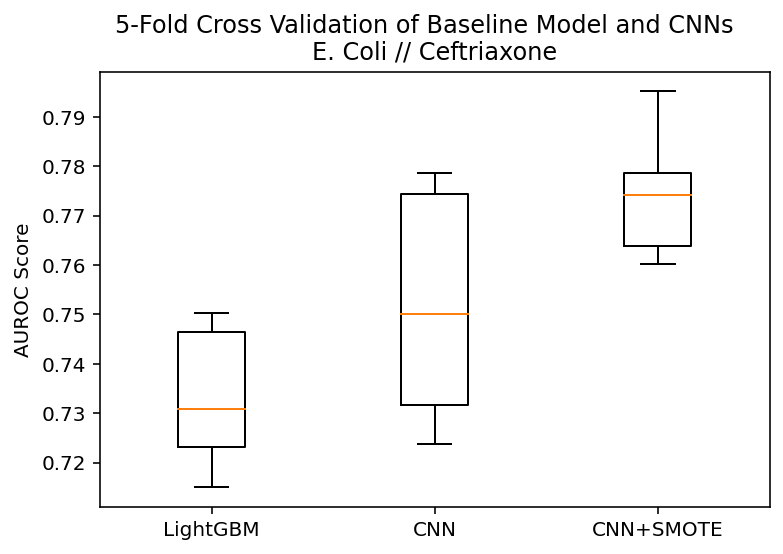

E. Coli // Ciprofloxacin:
['LightGBM', 'CNN', 'CNN+SMOTE'] [0.716138908605511, 0.6677107797862515, 0.7094752788872056]
Best: LightGBM 0.716138908605511 +0.0


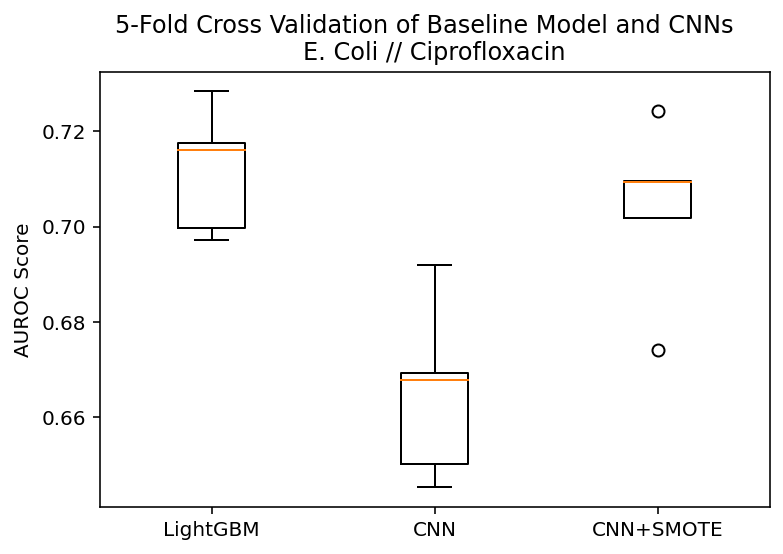

E. Coli // Cefepime:
['LightGBM', 'CNN', 'CNN+SMOTE'] [0.5516215220195321, 0.6206928321356182, 0.7689331122166944]
Best: CNN+SMOTE 0.7689331122166944 +0.39395052861890983


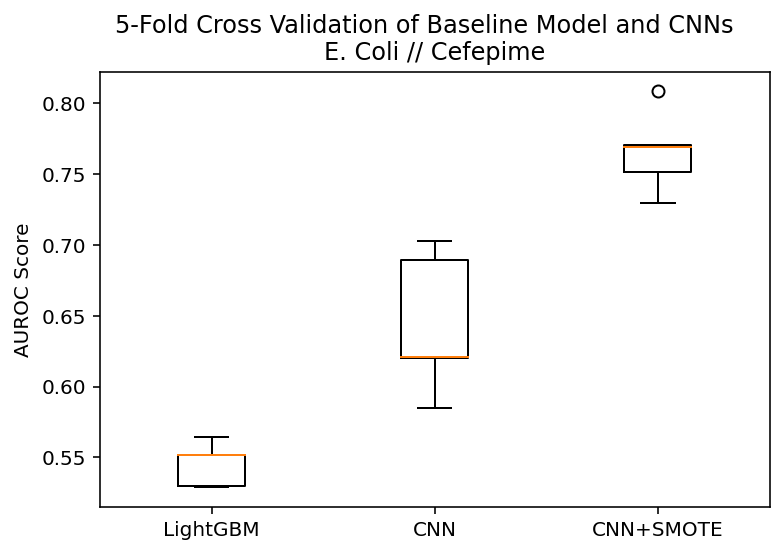

In [48]:
box_plots(
    pathogen='E. Coli',
    fname_prefix='ecoli',
    xlabels=['LightGBM', 'CNN', 'CNN+SMOTE'],
    cnn_results=load_results('./results/1d_cnn/ecoli'),
    base_results={
        'Ceftriaxone': [
            0.7503225806451613,
            0.7308755760368664,
            0.7151152073732718,
            0.7463594470046083,
            0.7232258064516129,
        ],
        'Ciprofloxacin': [
            0.7283968861327352,
            0.6971438560062716,
            0.7161389086055110,
            0.6997367389531004,
            0.7175902874153803,
        ],
        'Cefepime': [
            0.5292342234573126,
            0.5646950433020084,
            0.5516215220195321,
            0.5516215220195321,
            0.5298507462686567,
        ],
    },
)


## S. aureus

S. aureus // Ciprofloxacin:
['LightGBM', 'CNN', 'CNN+SMOTE'] [0.7653049975502204, 0.70809628347041, 0.7500115763964993]
Best: LightGBM 0.7653049975502204 +0.0


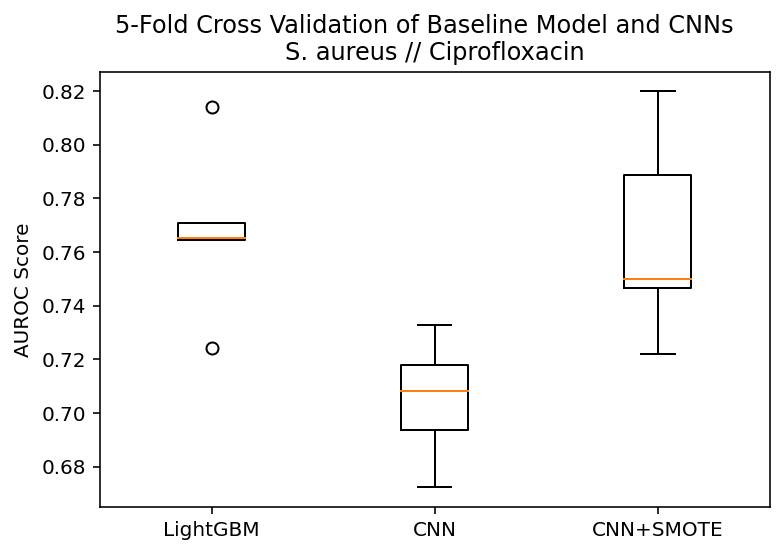

S. aureus // Fusidic acid:
['LightGBM', 'CNN', 'CNN+SMOTE'] [0.56733048838312, 0.5, 0.6155941008882186]
Best: CNN+SMOTE 0.6155941008882186 +0.08507142396427343


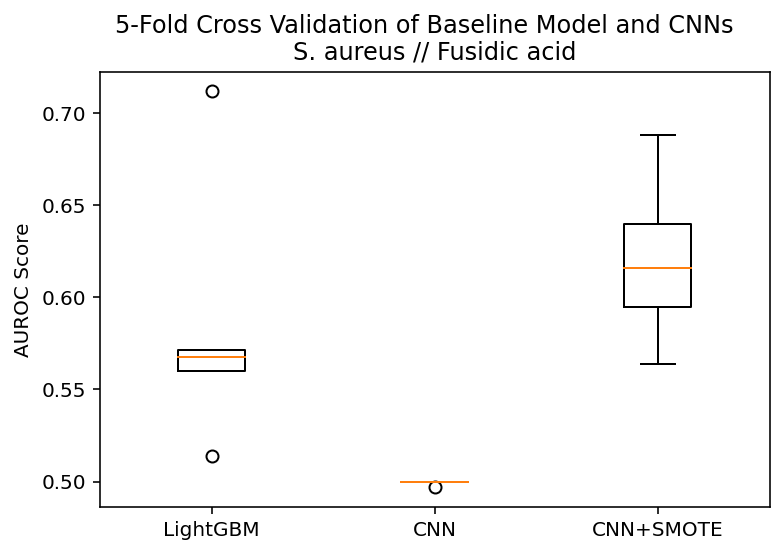

S. aureus // Oxacillin:
['LightGBM', 'CNN', 'CNN+SMOTE'] [0.8398511698585442, 0.7652654669173605, 0.8211002981380436]
Best: LightGBM 0.8398511698585442 +0.0


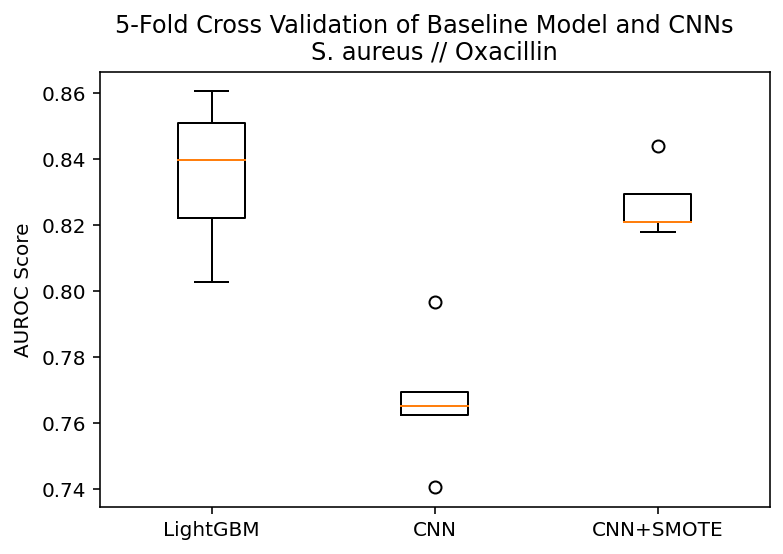

In [49]:
box_plots(
    pathogen='S. aureus',
    fname_prefix='aureus',
    xlabels=['LightGBM', 'CNN', 'CNN+SMOTE'],
    cnn_results=load_results('./results/1d_cnn/aureus'),
    base_results={
        'Ciprofloxacin': [
            0.8138548945662489,
            0.7242650661440471,
            0.7708904948554631,
            0.7653049975502204,
            0.7643373821162298,
        ],
        'Fusidic acid': [
            0.5139014612698822,
            0.7115867063235484,
            0.5715488215488215,
            0.5598420098420099,
            0.5673304883831200,
        ],
        'Oxacillin': [
            0.8398511698585442,
            0.8028407492827812,
            0.8605163975923946,
            0.8509253529841930,
            0.8220856835885040,
        ],
    },
)

## K. pneumoniae

K. pneumoniae // Ceftriaxone:
['MLP', 'CNN', 'CNN+SMOTE'] [0.7468879668049793, 0.7501382488479263, 0.7741013824884794]
Best: CNN+SMOTE 0.7741013824884794 +0.03643573988735292


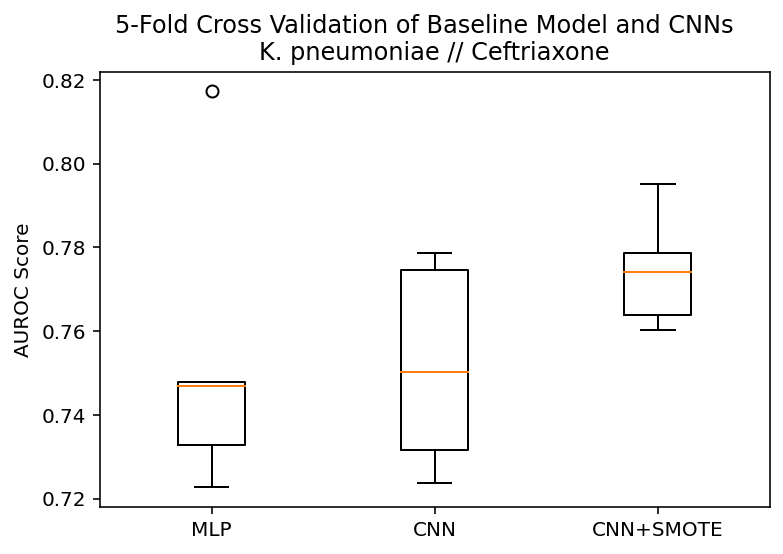

K. pneumoniae // Ciprofloxacin:
['MLP', 'CNN', 'CNN+SMOTE'] [0.7130625248904818, 0.6677107797862515, 0.7094752788872056]
Best: MLP 0.7130625248904818 +0.0


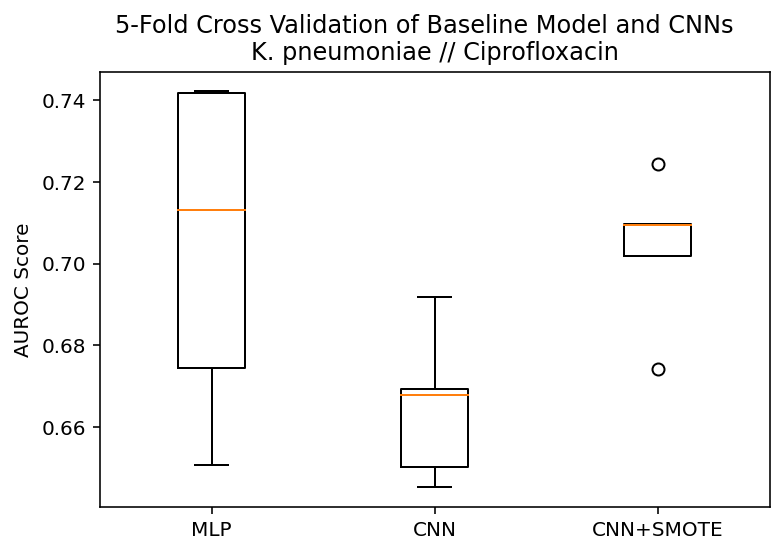

K. pneumoniae // Cefepime:
['MLP', 'CNN', 'CNN+SMOTE'] [0.7092352092352092, 0.6206928321356182, 0.7689331122166944]
Best: CNN+SMOTE 0.7689331122166944 +0.08417222129434222


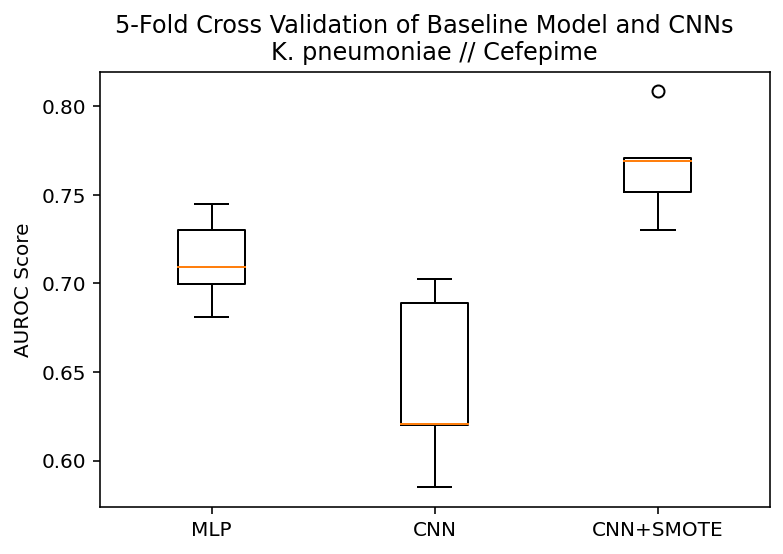

In [50]:
box_plots(
    pathogen='K. pneumoniae',
    fname_prefix='kpn',
    xlabels=['MLP', 'CNN', 'CNN+SMOTE'],
    cnn_results=load_results('./results/1d_cnn/ecoli'),
    base_results={
        'Ceftriaxone': [
            0.7227988829505513,
            0.7477703057185101,
            0.8172127629131493,
            0.7327988829505513,
            0.7468879668049793,
        ],
        'Ciprofloxacin': [
            0.6506556517178076,
            0.7417650144243378,
            0.6743377917650144,
            0.7421321793863100,
            0.7130625248904818,
        ],
        'Cefepime': [
            0.7449494949494949,
            0.7301226551226552,
            0.7092352092352092,
            0.6811529271206690,
            0.6996714456391876,
        ],
    },
)
